In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from sklearn.model_selection import train_test_split
import pandas as pd 

path = "/content/drive/My Drive/Colab Notebooks/Datasets_general/column_3C_weka.csv"
dataFrame = pd.read_csv(path)
X = dataFrame.iloc[:,0:-1]
y = dataFrame.iloc[:,-1:]

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# No requirement of imputation as no null values

normalizer = Normalizer().fit(X_train)  
X_train = pd.DataFrame(normalizer.transform(X_train))
X_test = pd.DataFrame(normalizer.transform(X_test))

In [14]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC

kernel_svm = svm.SVC(kernel='rbf', gamma='scale')
kernel_svm.fit(X_train, y_train.values.ravel())
y_pred = kernel_svm.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.7961165048543689


In [0]:
from sklearn import decomposition

number_of_features = X_train.shape[1]
accuracy_per_componenet = []
componenets = []
for i in range (number_of_features):
  pca = decomposition.PCA(n_components = i+1)
  X_train_reduced = pd.DataFrame(pca.fit_transform(X_train))
  X_test_reduced = pd.DataFrame(pca.transform(X_test))
  kernel_svm_pca = svm.SVC(kernel='rbf', gamma='scale')
  kernel_svm_pca.fit(X_train_reduced, y_train.values.ravel())
  y_pred = kernel_svm_pca.predict(X_test_reduced)
  score = accuracy_score(y_test, y_pred)
  accuracy_per_componenet.append(score)
  componenets.append(i+1)

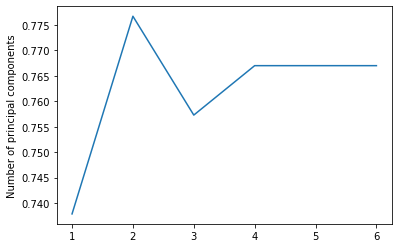

In [16]:
import matplotlib.pyplot as plt
plt.plot( componenets, accuracy_per_componenet)
plt.ylabel('Number of principal components')
plt.show()

In [17]:
pca = decomposition.PCA(n_components = 'mle',svd_solver='full')
X_train_reduced = pd.DataFrame(pca.fit_transform(X_train))
X_test_reduced = pd.DataFrame(pca.transform(X_test))
kernel_svm_pca = svm.SVC(kernel='rbf', gamma='scale')
kernel_svm_pca.fit(X_train_reduced, y_train.values.ravel())
y_pred = kernel_svm_pca.predict(X_test_reduced)
score = accuracy_score(y_test, y_pred)
print(score)

0.7669902912621359
